In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imshow
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 15
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = 16,8

import warnings
warnings.filterwarnings('ignore')

In [4]:
np.array([1,2,3,4,5,6,7,8,9,10,1,2,3,4,5,6,7,8,9,10]).reshape(4,5)

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [8]:
train = pd.read_json('data/train.json', typ = 'frame')
train['updt_date'] = pd.to_datetime(train['updt_date'])
train.head()

,tags,id,plylst_title,songs,like_cnt,updt_date
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56


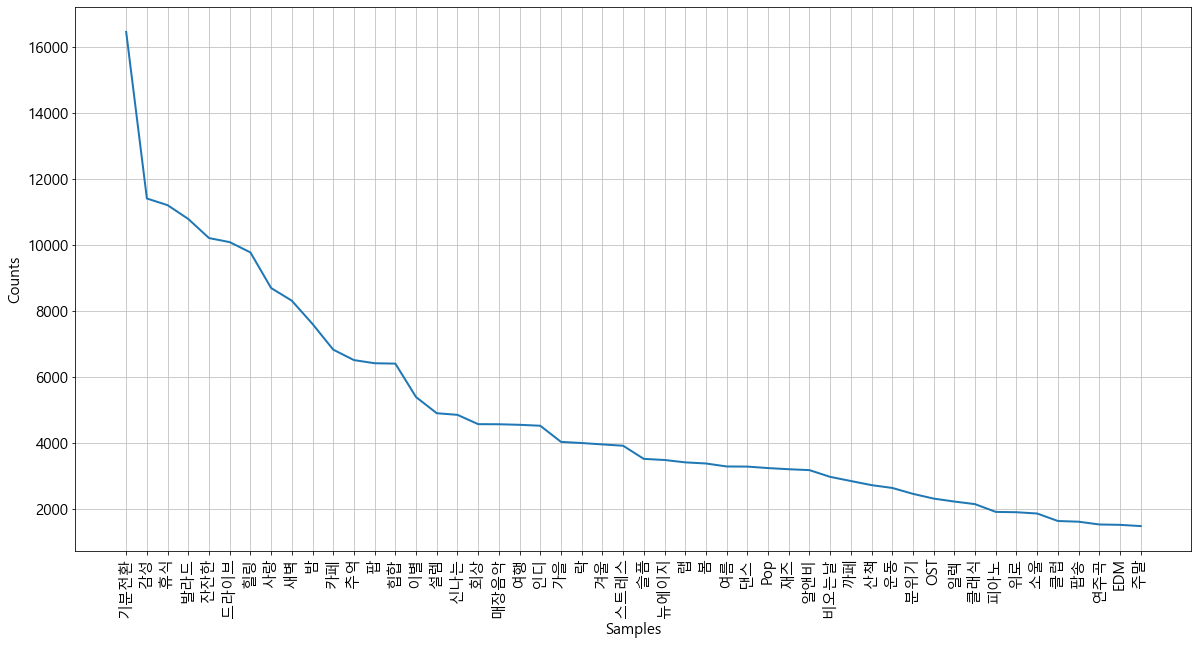

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [9]:
word_split = []

for i in train['tags']:
    for j in i:
        word_split.append(j)
        

from nltk.probability import FreqDist
plt.figure(figsize=(20,10))
FreqDist(word_split).plot(50)

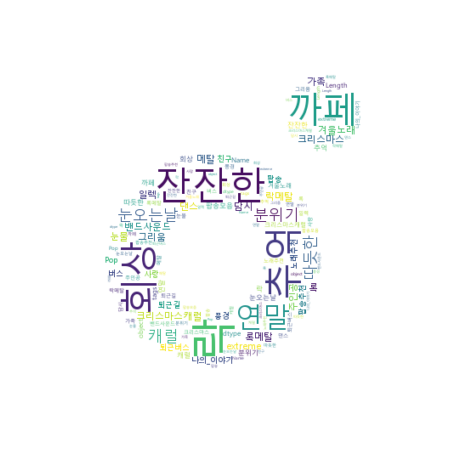

In [10]:
from PIL import Image
masks = np.array(Image.open("image/melon.bmp"))

fig, ax = plt.subplots()
wc = WordCloud(font_path=r'C:\Windows\Fonts\C:\Windows\Fonts\malgun.ttf',
               max_words=2000,
               background_color='white',
               mask = masks,
               repeat=True,
               stopwords='english').generate(str(train['tags']))

ax.imshow(wc,interpolation='bilinear')
ax.axis('off')
plt.show()

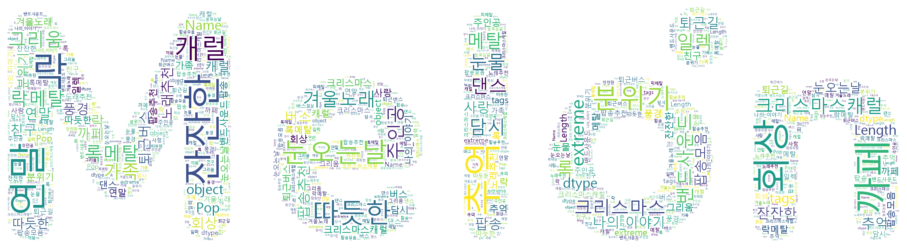

In [11]:
masks = np.array(Image.open("image/Melon_logo.bmp"))

fig, ax = plt.subplots()
wc = WordCloud(font_path=r'C:\Windows\Fonts\C:\Windows\Fonts\malgun.ttf',
               max_words=2000,
               background_color='white',
               mask = masks,
               repeat=True,
               stopwords='english').generate(str(train['tags']))

ax.imshow(wc,interpolation='bilinear')
ax.axis('off')
plt.show()

---

In [12]:
song_meta = pd.read_json('data/song_meta.json', typ = 'frame')

In [13]:
song_mm = song_meta.copy()
song_mm['song_gn_gnr_basket'] = song_mm['song_gn_gnr_basket'].apply(lambda x : "".join(x))
song_mm['artist_name_basket'] = song_mm['artist_name_basket'].apply(lambda x : "".join(x))
song_mm.rename(columns = {'song_gn_gnr_basket':'gnr_code'},inplace=True)
song_mm['year'] = song_mm['issue_date'].astype('object')
song_mm

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,gnr_code,artist_name_basket,id,year
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,GN0900,Various Artists,0,20140512
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",GN1600,Murray Perahia,1,20080421
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),GN0900,Peter Gabriel,2,20180518
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,GN1100,Matoma,3,20151016
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,GN1800,Jude Law,4,20110824
...,...,...,...,...,...,...,...,...,...,...
707984,[GN2001],19991219,The Best Best Of The Black President,65254,[166499],Coffin For Head Of State,GN2000,Fela Kuti,707984,19991219
707985,[GN0901],19860000,True Colors,44141,[11837],Change Of Heart,GN0900,Cyndi Lauper,707985,19860000
707986,"[GN0105, GN0101]",20160120,행보 2015 윤종신 / 작사가 윤종신 Live Part.1,2662866,[437],스치듯 안녕,GN0100,윤종신,707986,20160120
707987,"[GN1807, GN1801]",20131217,명상의 시간을 위한 뉴에이지 음악,2221722,[729868],숲의 빛,GN1800,Nature Piano,707987,20131217


In [14]:
song_mm['artist_name_basket'].value_counts()

Various Artists    23184
태교 마을               1588
Michael Jackson      743
루이뮤직                 658
자장가                  646
                   ...  
Hanzawa Takeshi        1
Stanton Project        1
허각VICTON (빅톤)          1
Urselle                1
Bikini Kill            1
Name: artist_name_basket, Length: 120361, dtype: int64

In [15]:
genre_gn_all = pd.read_json('data/genre_gn_all.json', typ = 'series')
genre_gn_all = pd.DataFrame(genre_gn_all,columns = ['gnr_name']).reset_index().rename(columns = {'index' : 'gnr_code'})
genre_gn_all

,gnr_code,gnr_name
0,GN0100,발라드
1,GN0101,세부장르전체
2,GN0102,'80
3,GN0103,'90
4,GN0104,'00
...,...,...
249,GN2900,뮤지컬
250,GN2901,세부장르전체
251,GN2902,국내뮤지컬
252,GN2903,국외뮤지컬


In [16]:
song_genre = song_mm[['artist_name_basket','gnr_code','song_name']]
song_genre = pd.merge(song_genre, genre_gn_all, 
                      on = 'gnr_code',
                      how = 'left')
song_genre

,artist_name_basket,gnr_code,song_name,gnr_name
0,Various Artists,GN0900,Feelings,POP
1,Murray Perahia,GN1600,"Bach : Partita No. 4 In D Major, BWV 828 - II....",클래식
2,Peter Gabriel,GN0900,Solsbury Hill (Remastered 2002),POP
3,Matoma,GN1100,Feeling Right (Everything Is Nice) (Feat. Popc...,일렉트로니카
4,Jude Law,GN1800,그남자 그여자,뉴에이지
...,...,...,...,...
707984,Fela Kuti,GN2000,Coffin For Head Of State,월드뮤직
707985,Cyndi Lauper,GN0900,Change Of Heart,POP
707986,윤종신,GN0100,스치듯 안녕,발라드
707987,Nature Piano,GN1800,숲의 빛,뉴에이지


In [17]:
genre_top10 = pd.DataFrame(song_genre['gnr_name'].value_counts()).reset_index().rename(columns = {'index' : 'gnr_name',
                                                                                                    'gnr_name' : 'gnr_cnt'})
genre_top10['gnr_pct'] = round((genre_top10['gnr_cnt']/genre_top10['gnr_cnt'].sum())*100,2)
genre_top10.index = range(1,24)
genre_top10.head(10)

,gnr_name,gnr_cnt,gnr_pct
1,POP,64752,10.60
2,록/메탈,64750,10.60
3,클래식,56557,9.26
4,일렉트로니카,53421,8.74
5,랩/힙합,51430,8.42
6,재즈,48176,7.89
7,R&B/Soul,42413,6.94
8,뉴에이지,42357,6.93
9,발라드,41155,6.74
10,OST,27566,4.51


In [18]:
POP = song_genre.query('gnr_name == "POP"')
POP = pd.DataFrame(POP['artist_name_basket'].value_counts()).rename(columns = {'artist_name_basket':'artist_cnt'})
POP

,artist_cnt
Various Artists,1421
Michael Jackson,602
Elvis Presley,436
Westlife,397
Britney Spears,382
...,...
T-PainLudacris,1
The All-American Rejects,1
Anx,1
Bunny Sigler,1


In [19]:
ROCK = song_genre.query('gnr_name == "록/메탈"')
ROCK = pd.DataFrame(ROCK['artist_name_basket'].value_counts()).rename(columns = {'artist_name_basket':'artist_cnt'})
ROCK

,artist_cnt
Queen,515
David Bowie,450
Bon Jovi,383
The Beatles,309
Oasis,292
...,...
Julia Shapiro,1
Phenix,1
Peaches,1
확돈 (이승환&CL),1


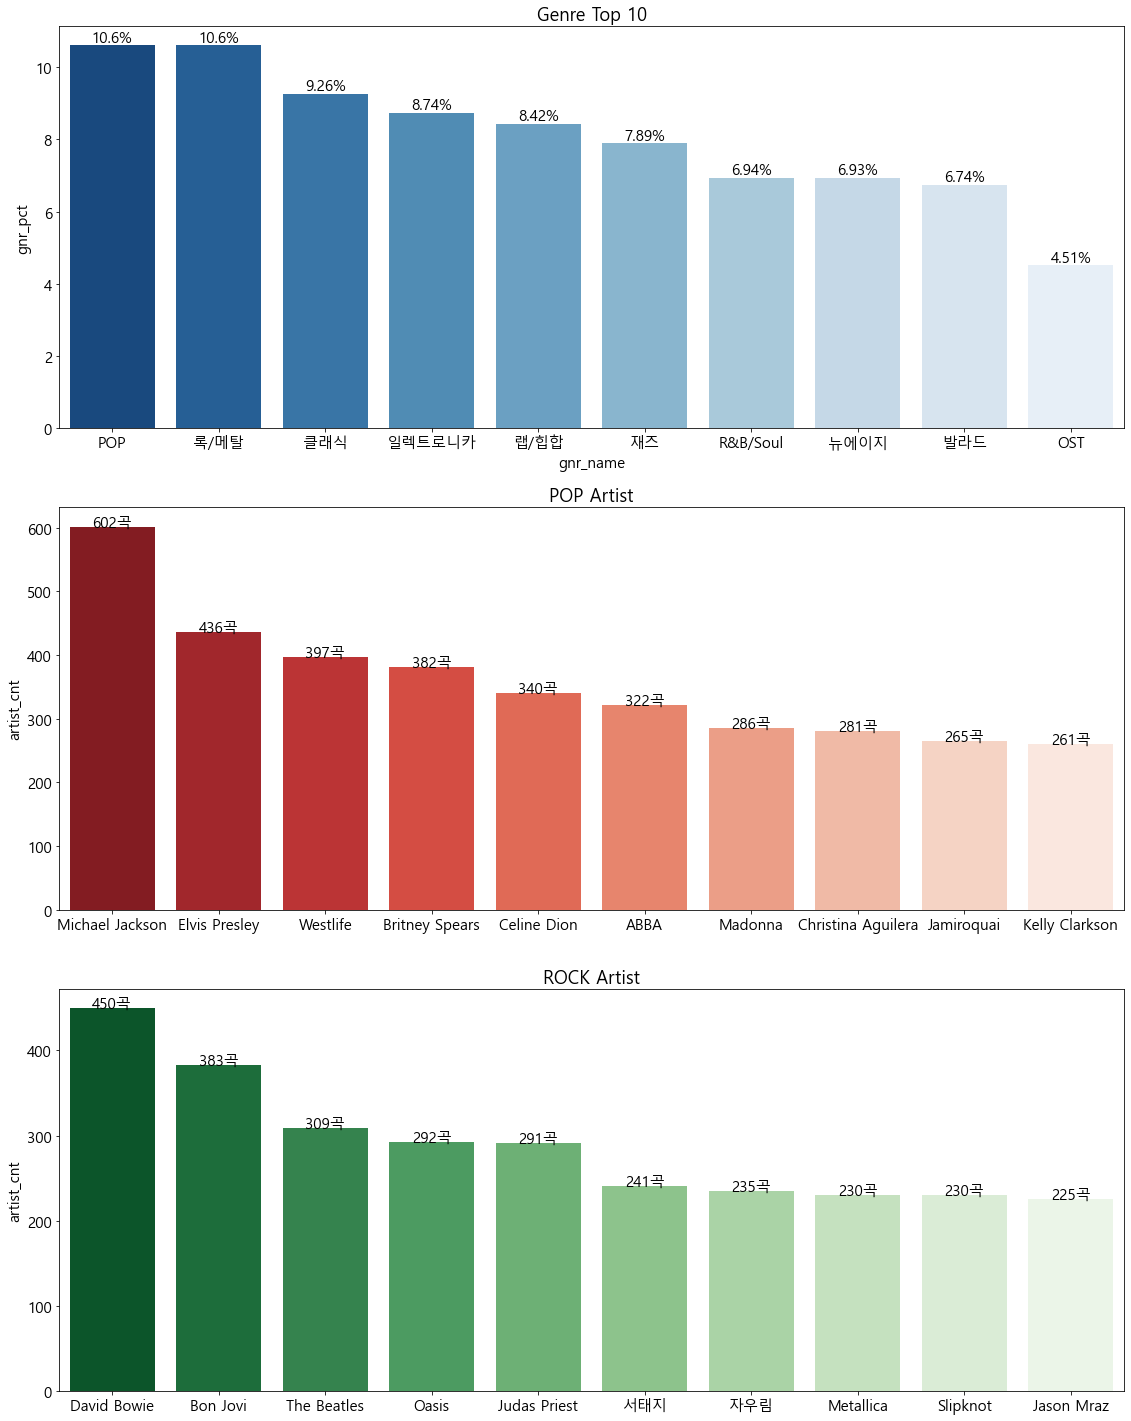

In [20]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,
                                 figsize=(16,20))


# genre_top10
sns.barplot(genre_top10[:10]['gnr_name'],genre_top10[:10]['gnr_pct'],
            ax = ax1,
           palette= 'Blues_r')

for idx, value in enumerate(genre_top10[:10]['gnr_pct']):
    txt = f'{value}%'
    
    ax1.text(idx,value+0.1,txt, color='black',
             horizontalalignment = 'center')
ax1.set_title('Genre Top 10')


# POP
sns.barplot(POP[1:11].index,POP[1:11]['artist_cnt'],
            ax = ax2,
           palette= 'Reds_r')

for idx, value in enumerate(POP[1:11]['artist_cnt']):
    txt = f'{value}곡'
    
    ax2.text(idx,value+0.1,txt, color='black',
             horizontalalignment = 'center')
ax2.set_title('POP Artist')


#ROCK
sns.barplot(ROCK[1:11].index,ROCK[1:11]['artist_cnt'],
            ax = ax3,
           palette= 'Greens_r')

for idx, value in enumerate(ROCK[1:11]['artist_cnt']):
    txt = f'{value}곡'
    
    ax3.text(idx,value+0.1,txt, color='black',
             horizontalalignment = 'center')
ax3.set_title('ROCK Artist')
    

plt.tight_layout()
plt.show()

**POP Artist, ROCK Artist의 경우는 둘 다 1위가 Various Artists여서 그래프에는 뺐습니다**

In [26]:
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import re
from PIL import Image
from io import BytesIO
from nltk.tokenize import RegexpTokenizer
import nltk
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
train.head()

,tags,id,plylst_title,songs,like_cnt,updt_date
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56


In [30]:
print('전체 문서의 수 :',len(train['tags']))

전체 문서의 수 : 115071


In [130]:


# 한글 stopword 지우기
def getWord(sentence, stopwords):
    sentence = sentence.split()
    result = [token  for  token  in  sentence if not token in stopwords]
    return " ".join(result)

In [133]:
stopwords = pd.read_csv('data/stopword.csv')
stopwords = np.array(stopwords['stopwords'].tolist())
stopwords

array(['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해',
       '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여',
       '입각하여', '기준으로', '예하면', '예를', '들면', '들자면', '저', '소인', '소생', '지말고',
       '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수', '없다', '해서는', '안된다',
       '뿐만', '아니라', '만이', '아니다', '만은', '막론하고', '관계없이', '그치지', '않다', '그러나',
       '그런데', '하지만', '든간에', '논하지', '따지지', '설사', '비록', '더라도', '아니면', '만',
       '못하다', '하는', '편이', '낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타',
       '이용하여', '타다', '오르다', '제외하고', '이', '외에', '밖에', '하여야', '비로소', '한다면',
       '몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할', '생각이다',
       '하려고하다', '이리하여', '그리하여', '그렇게', '함으로써', '일때', '할때', '앞에서', '중에서',
       '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다',
       '할수있어', '임에', '틀림없다', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동',
       '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여',
       '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마'

In [135]:
getWord(train['tags'],stopwords)

AttributeError: 'Series' object has no attribute 'split'

In [136]:
train['tags'].apply(lambda x : getWord(x,stopwords))

AttributeError: 'list' object has no attribute 'split'

In [145]:
# 플레이리스트 아이디(id)와 매핑된 태그(tags) 추출
plylst_tag_map = train[['id', 'tags']]

# unnest tags
plylst_tag_map_unnest = np.dstack(
    (
        np.repeat(plylst_tag_map.id.values, list(map(len, plylst_tag_map.tags))), 
        np.concatenate(plylst_tag_map.tags.values)
    )
)

# unnested 데이터프레임 생성 : plylst_tag_map
plylst_tag_map = pd.DataFrame(data = plylst_tag_map_unnest[0], columns = plylst_tag_map.columns)
plylst_tag_map['id'] = plylst_tag_map['id'].astype(str)

In [151]:
train['plylst_title'].apply(lambda x : getWord(x,stopwords))

0                                   여행같은 음악
1                                     요즘 말야
2                       편하게, 잔잔하게 들을 있는 곡.-
3                     크리스마스 분위기에 흠뻑 취하고 싶을때
4                                  추억의 노래 ㅋ
                        ...                
115066                        METAL E'SM #2
115067       빠른 리스너를 위한 따끈따끈한 최신 인기 EDM 모음!
115068                #1. 눈물이 앞을 가리는 나의_이야기
115069    퇴근 버스에서 편히 들으면서 하루를 마무리하기에 좋은 POP
115070                  FAVORITE POPSONG!!!
Name: plylst_title, Length: 115071, dtype: object

In [150]:
plylst_tag_map

,id,tags
0,61281,락
1,10532,추억
2,10532,회상
3,76951,까페
4,76951,잔잔한
...,...,...
476326,131982,퇴근길
476327,100389,노래추천
476328,100389,팝송추천
476329,100389,팝송
